# **Universidad de Antioquia**
## Helicopters

---

### Assignment 1 - Fundamentals
### Presented by: Simón Patiño Idarraga 
### Presented by: Andrés Felipe Muñoz Cabrera 

### Presented to: PhD. Diego Francisco Hidalgo

---

In [1]:
import numpy as np
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

#*Punto 1*

###*The induce power is defined how:*

\

$$
P = k \cdot \frac{T^{3/2}}{\sqrt{2 \rho A}}
$$

\

###*Where $k$ is the addition power factor due to rotor cut-out and tip loses.*

###*To calculate $k$, let's compare the induce power in ideal conditions ( not loss factor nor cut-out) vs the area of the real rotor ($A_e$).*

###*For our case $B = 0.97$ and the **Cut-out** =  $\ 25\%$*


$$
A_e = B^2 \cdot \pi R^2 - \pi \cdot (\frac{1}{4} R)^2 \\
A_e = \pi R^2 (B^2 - r_o^2) = A \cdot (B^2 - r_o^2)
$$

###*Where $\pi R^2$ is the normal area ($A$)*

$$
A_e = 0.8784A
$$

###*the ideal power is:*


$$
P = \frac{T^{3/2}}{\sqrt{2 \rho A}}
$$

###*The actual power is*

$$
P = \frac{T^{3/2}}{\sqrt{2 \rho A_e}}
$$

$$
P = \frac{T^{3/2}}{\sqrt{2 \rho A \cdot ( B^2 - r_o^2)}} =  \frac{1}{\sqrt{B^2 - r_0^2}} \cdot  \frac{T^{3/2}}{\sqrt{2 \rho A  }}
$$

###*For comparison, it is possible to observe that $ \ k =  \frac{1}{\sqrt{B^2 - r_0^2}}$*

\

$$
k = \frac{1}{\sqrt{0.8784}} = 1.067
$$

\

###*Now, we are going to calculate $k$ factor for the same $B$ but sweeping the **Cut-out** from 0$\%$ to 30 $\%$. Also let`s observe the induce power using the data of a real helicopter (Lynx)*

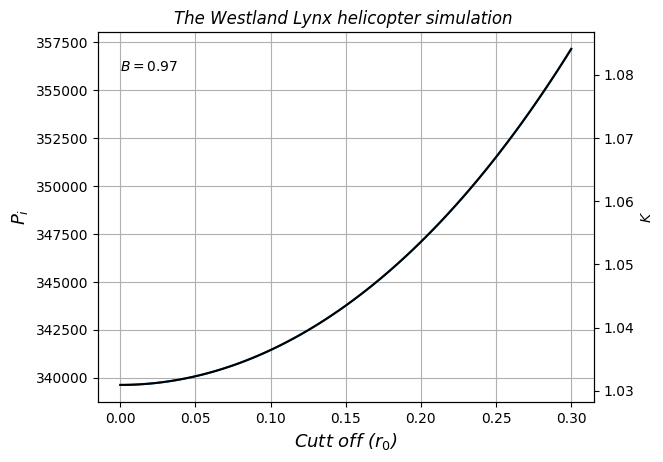

In [2]:
cut_off = np.linspace(0,0.3,100)

R = 6.4 #meters

B = 0.97

A = np.pi*R**2

Ae  = (B**2)*np.pi*R**2 - np.pi*(cut_off*R)**2

e = B**2 - cut_off**2

rho = 1.2 # kg/m3

Omega = 35.56 #rad/s

T = 3290*9.8 #kg Hover

Cpi = (T/(rho*Ae*(Omega**2)*(B**2)*(R**2)))**(3/2)/(np.sqrt(2))

P = (T**(3/2)/(2*rho*Ae)**(1/2))

#ks = 1/((e*(B**2))**(3/2))  k del coeficiente de potencia

ks = 1/(e**(1/2))

fig, ax1 = plt.subplots()

ax1.plot(cut_off,P, label = "$P_i$" )
ax1.set_xlabel('Cutt off ($r_0$)' , fontstyle = "italic",  fontsize = 13)
ax1.set_ylabel('$P_i$', fontsize = 13)

ax2 = ax1.twinx()

# Plot the second variable on the right y-axis
ax2.plot(cut_off, ks, 'k', label='$K$' )

ax2.set_ylabel('$K$', color='k')

#ax1.legend(loc='upper left')
#ax2.legend(loc='lower right')

plt.title("The Westland Lynx helicopter simulation ", fontstyle="italic")

ax1.text(0, 356000, "$B ={B}$".format(B = B), fontsize=10, color='k')
#ax1.legend()
#ax2.legend()

ax1.grid()
plt.show()

#Punto 2

###*The downwash velocity in terms of the disk loading is:*

\

$$
W = 2 \cdot \sqrt{ \left(\frac{T}{A}\right) \cdot \frac{1}{ 2 \rho} }
$$

\

###*Solving this equation from $\left(\frac{T}{A}\right) = 0$ to 1000 $\frac{N}{m^2}$*

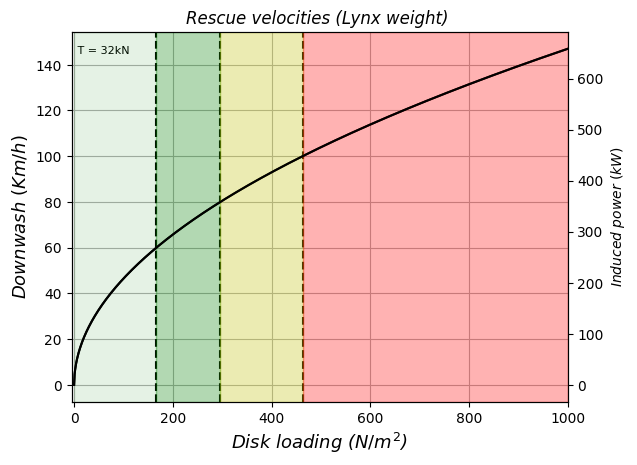

In [3]:
DL = np.linspace(0,1000,1000) #N/m2

vh = np.sqrt(DL*(1/(2*rho)))

W = 2*vh # m/s

T = 3290*9.8 #kg

P = vh*T

W2 = np.sqrt(DL*2/rho)

fig, ax1 = plt.subplots()

ax1.plot(DL,W*(3600/1000), label = "", color = "k")
ax1.set_xlabel('Disk loading ($N/m^2$)' , fontstyle = "italic",  fontsize = 13)
ax1.set_ylabel('$Downwash\ (Km/h)$', fontsize = 13)

ax2 = ax1.twinx()

# Plot the second variable on the right y-axis
ax2.plot(DL, P/1000, 'k', label='$P$' )
ax2.set_ylabel('$Induced\ power\ (kW)$', color='k')

#ax1.legend(loc='upper left')
#ax2.legend(loc='lower right')

plt.title("Rescue velocities (Lynx weight) ", fontstyle="italic")

#ax1.text(200.6, 60,'Low risk (166.6 N/$m^2$)', fontstyle ="italic" ,fontsize=10, color='k')

ax1.axvline(166.6, linestyle="dashed", color = "k" )

ax1.axvline(296, linestyle="dashed", color = "k" )

ax1.axvline(462.96, linestyle="dashed", color = "k" )

plt.axvspan( 0, 166.6, color='g', alpha=0.1)  # alpha controls the transparency

plt.axvspan(166.6, 296, color='g', alpha=0.3)  # alpha controls the transparency

plt.axvspan( 296, 462.96, color='y', alpha=0.3)  # alpha controls the transparency

plt.axvspan( 462.96, 1000, color='r', alpha=0.3)  # alpha controls the transparency

ax1.set_xlim(-5, 1000)

ax1.text(0, 145,' T = 32kN', fontsize=8, color='k')

ax1.grid()
plt.show()

###*The colors represent the risky associate with the downwash velocity.*

###*The disk loadings corresponding to each velocity's risk transition zone are:*



*   Low risk:  $\leq$ 166 N/$m^2$
*   Potentially acceptable: 166 - 296 N/$m^2$
*   Higher risk: 296 - 462.96 N/$m^2$
*   Potentially unsafe:  $\geq$ 462.96 N/$m^2$



#*Punto 3*

###Find $\lambda$

$$
\lambda=\mu \tan \alpha+\frac{C_T}{2 \sqrt{\mu^2+\lambda^2}}
$$


###*For finding $\lambda$*, you need to find $\lambda_h$ first

\

$$
\lambda_h = \frac{1}{\Omega \cdot R} \cdot \sqrt{ \left(\frac{m \cdot g}{A}\right) \cdot \frac{1}{ 2 \rho}}
$$

\

###*If we are planning to calculate $\lambda$* for a forward speed ratio ($\frac{\mu}{\lambda_h}  \ $) from 0 to 10, we are going to need  $\mu_i$ for each $\frac{\mu_i}{\lambda_h}  \ $.

\

$$
\mu_i = \left( \frac{\mu_i}{\lambda_h}  \right) \cdot \lambda_h
$$

###*Also, we know:*

$$
C_T = 2 \lambda_h^2
$$

\

###*We have everything to solve find $\lambda$ but we need to work with a trascendetal equation.*


$$
0 =  \mu \tan \alpha+\frac{C_T}{2 \sqrt{\mu^2+\lambda^2}} - \lambda
$$

\

###*Fortunately, we can use a method like Newton to find a numerical value of $\lambda$ for each $ \mu_i$*

Text(0, 0.5, '$\\frac{\\lambda}{\\lambda_h}$')

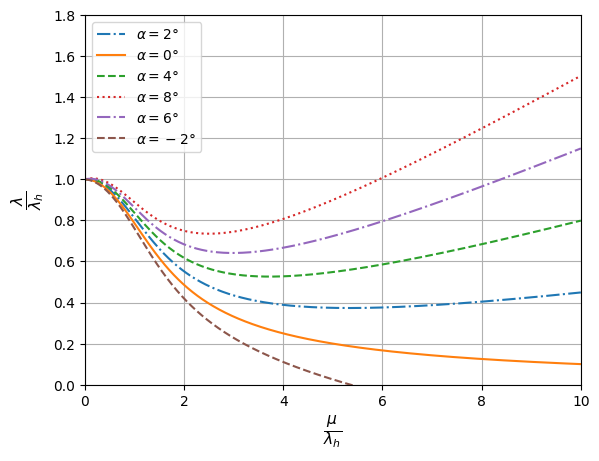

In [4]:
R = 8.17 #m
m = 7257 #kg
Omega = 27 #rad / s
A = np.pi*(R**2)

inflow_hover =  1/(Omega*R)*np.sqrt(m*9.81/(2*A*rho))

forward_speed_ratio = np.linspace(0,10,1000)

mu = forward_speed_ratio*inflow_hover

alpha = np.array([-2, 0, 2, 4, 6, 8])

alpha = np.deg2rad(alpha)

C_T = 2*(inflow_hover**2)

pre_solution = []

pre_solution0 = []

pre_solution4 = []

pre_solution6 = []

pre_solution8 = []

pre_solutionmin2 = []

def equation(lambda_, mu, alpha, C_T):
    return lambda_ - (mu * np.tan(alpha) + C_T / (2 * np.sqrt(mu**2 + lambda_**2)))

for i in range(len(mu)):

  pre_solution.append(fsolve(equation, 1, args=(mu[i], alpha[2], C_T)))
  pre_solution0.append(fsolve(equation, 1, args=(mu[i], alpha[1], C_T)))
  pre_solution4.append(fsolve(equation, 1, args=(mu[i], alpha[3], C_T)))
  pre_solution6.append(fsolve(equation, 1, args=(mu[i], alpha[4], C_T)))
  pre_solution8.append(fsolve(equation, 1, args=(mu[i], alpha[5], C_T)))
  pre_solutionmin2.append(fsolve(equation, 1, args=(mu[i], alpha[0], C_T)))

solution = pre_solution/inflow_hover
solution0 = pre_solution0/inflow_hover
solution4 = pre_solution4/inflow_hover
solution6 = pre_solution6/inflow_hover
solution8 = pre_solution8/inflow_hover
solutionmin2 = pre_solutionmin2/inflow_hover

plt.plot(forward_speed_ratio, solution , label = "$\\alpha = 2°$" , linestyle = "-.")
plt.plot(forward_speed_ratio, solution0 , label = "$\\alpha = 0°$")
plt.plot(forward_speed_ratio, solution4 , label = "$\\alpha = 4°$",linestyle = "--")
plt.plot(forward_speed_ratio, solution8 , label = "$\\alpha = 8°$", linestyle = ":")
plt.plot(forward_speed_ratio, solution6 , label = "$\\alpha = 6°$", linestyle = "-.")
plt.plot(forward_speed_ratio, solutionmin2 , label = "$\\alpha = -2°$", linestyle = "dashed")
plt.legend()

plt.grid()
plt.xlim(0,10)
plt.ylim(0,1.8)
plt.xlabel("$\\frac{\mu}{\lambda_h}$" ,fontsize = 16)
plt.ylabel("$\\frac{\lambda}{\lambda_h}$", fontsize = 16)

#'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Punto 4

## a.) Use blade-element-momentum theory (BEMT) to replicate the distribution of lift coefficients and thrust coefficients for the Caradonna-Tung experiment.

The process to follow will be:

* 1) Implement the method suggested in Section 3.3.4 (Numerical Solution) and Section 3.3.5 (Distributions of Inflows and Airloads) from Principles of Helicopter Aerodynamics by Leishman. The results will be compared by analyzing the distribution of $𝐶_𝑙$ along the radial station with the experimental data points, and comparing the value of 𝐶𝑇 with the experimentally obtained value.

* 2) Using the initial approach, we will apply corrections based on Section 3.3.10 (Prandtl's Tip-Loss Function). First, we will consider tip losses only, followed by both root and tip losses. The results will be compared, and we will select the better fit for our approach.

* 3) The value of $C_{L_\alpha}$ will be adjusted from the initial value to obtain the best approximation.

Using webplotdigitizer we get the next data from the dotted points in the results of the experiment.

In [5]:
# Experimental data

rRexperimental = (0.4961574665501244,0.675687487393263,0.7969239561621732,0.886754521616352,0.9610939285954415)
Clexperimental = (0.23335574531029385,0.28077052376790157,0.2864990250790022,0.314751563235393,0.2689504471189404)

The next step is get the initial conditions of the rotor and airfoil.

In this case we use an initial value of $C_{l_\alpha}$ since $2\pi$ to 5.72, however, **the value of 4.5** is obtained from the result of the replication. This parameter includes considerations such as the airfoil's roughness and other unknown conditions, which could not be accounted for in any other way in this assignment, but, the value obtained is almost a good aproximation for the real experiment.

The choice of 100 values for the dimensionless radial station is based on Leishman’s recommendation, where a minimum of 20 is required, but 40 or more is desirable. By using 100 values, we minimize the risk of losing important information during each cycle and take full advantage of the available computational power, ensuring a more detailed and accurate approach.

$\theta$ : Blade pitch in the experiment being constant.

In [6]:
# initial conditions

N = 2 # number of blades
R = 1.143 # [m] Rotor radius
b = 0.1905 # [m] blade chord length
pitch = 8 # [°] pitch angle
pitch_rad = pitch*np.pi/180 # [rad] pitch angle in radians
clalpha_initial_approach = 5.72 # Starting in 2pi and 5.72. Changing on the way of the replication
clalpha = 4.5 # Cl_alpha corrected
rR = np.linspace(0,1.0,100) # dimensionless Radial station

In an initial approximation, we should obtain a replication without applying any corrections.

First, we will use a constant value for the solidity ($\sigma$), as the chord, number of blades, and radius do not change throughout the replication. Then, we will calculate the inflow ($\lambda$) using Equation 3.71.

$$
\lambda(r_n) = \frac{\sigma C_{L_\alpha}}{16}(\sqrt{1+\frac{32}{\sigma C_{L_\alpha}}\theta(r_n)r_n}-1)
$$

Then we will obtain the values of $C_T$ and $C_P$ as Leishman do in the section with the equations 3.72, 3.73 and 3.74, respectively.

$$
\Delta C_{T_n} = \frac{\sigma C_{L_\alpha}}{2}(\theta(r_n)r_n^{2}-\lambda(r_n)r_n)\Delta r
$$
$$
C_T = \sum_{n=1}^{N} \Delta C_{T_n}
$$
$$
C_P = \sum_{n=1}^{N} \lambda_n \Delta C_{T_n}
$$

In [7]:
# BEMT: Numerical Solution

solidity = (N*b)/(np.pi*R) # Sigma (Nb*c/pi*R)
Lambda_n = [] # inflow
CTseg = [] # incremental thrust at each segment - CT no corrections
CPseg = [] # Induced torque (or power)
for i in rR:
  Lambda_rn = solidity*clalpha_initial_approach/16*(np.sqrt(1+((32/(solidity*clalpha_initial_approach))*pitch_rad*i))-1) # Equation 3.71
  Lambda_n.append(Lambda_rn)

for n in range(100):
  deltaCT = ((solidity*clalpha_initial_approach)/2)*(pitch_rad*rR[n]**2-Lambda_n[n]*rR[n])*(rR[n]-rR[n-1]) # Equation 3.72
  CTseg.append(deltaCT)
  deltaCP = Lambda_n[n]*deltaCT # Equation 3.74
  CPseg.append(deltaCP)

CT = sum(CTseg) # Total thrust Equation 3.73
CP = sum(CPseg) # Total power coefficient

print(f'The value for CT without corrections is: {CT}')
print(f'The value for CP without corrections is: {CP}')

The value for CT without corrections is: 0.006173361322985279
The value for CP without corrections is: 0.0003699220886458888


As we can see, the value of $C_T$ does not match the experimental value of 0.0046. Therefore, it will be necessary to make some corrections.

Before applying any corrections, we will plot the inflow and calculate the $C_l$ distribution using Equation 3.79. The results will then be plotted and compared with the experimental data.

Equation 3.79:

$$
C_l(r_n) = C_{l_\alpha} (\theta(r_n) - \frac{\lambda(r_n)}{r_n})
$$

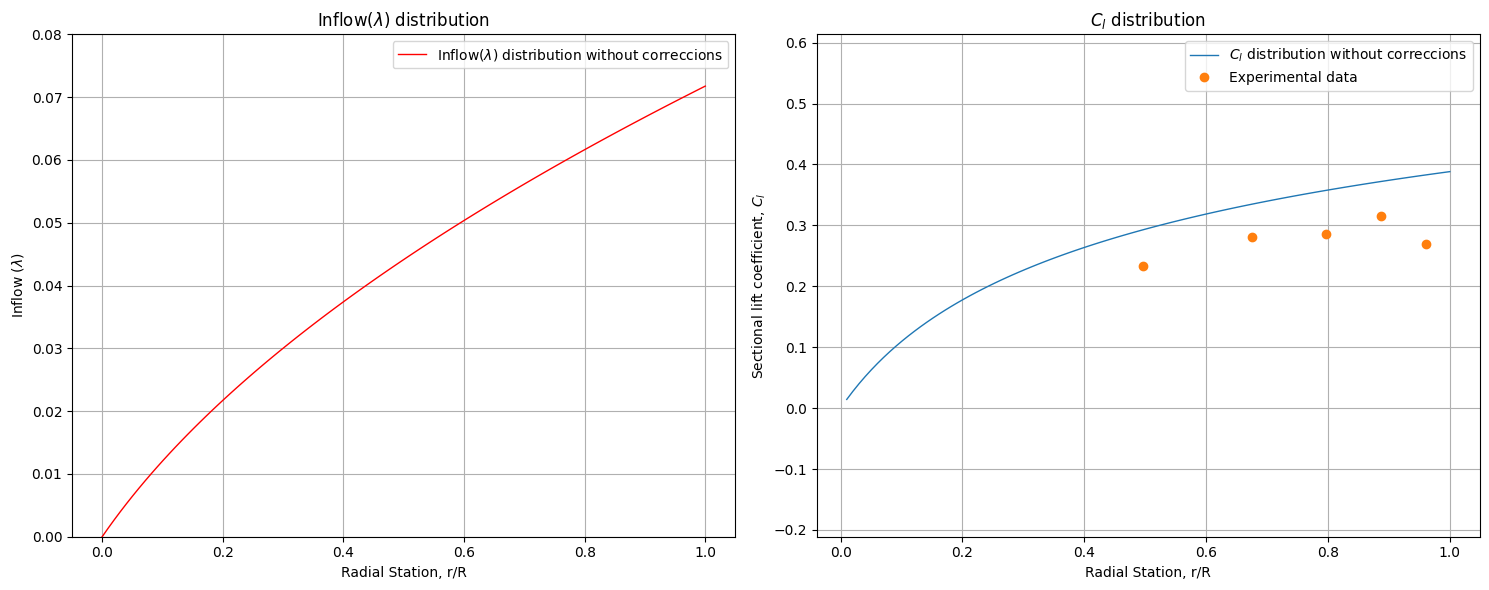

In [8]:
# Plotting the grapichs of inflow and C_L distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Inflow
ax1.plot(rR, Lambda_n, label='Inflow($\lambda$) distribution without correccions', linewidth=1,c='r')
ax1.set_title('Inflow($\lambda$) distribution')
ax1.set_xlabel('Radial Station, r/R')
ax1.set_ylabel('Inflow ($\lambda$)')
ax1.set_ylim(0, 0.08)
ax1.legend()
ax1.grid()

# Cl distributions
Cl = []
for n in range(1, 100):
    deltaCl = clalpha_initial_approach * (pitch_rad - (Lambda_n[n] / rR[n]))  # Equation 3.79
    Cl.append(deltaCl)

ax2.plot(rR[1:], Cl, label='$C_l$ distribution without correccions', linewidth=1)
ax2.plot(rRexperimental, Clexperimental, 'o', label='Experimental data')
ax2.set_title('$C_l$ distribution')
ax2.set_xlabel('Radial Station, r/R')
ax2.set_ylabel('Sectional lift coefficient, $C_l$')
ax2.legend()
ax2.grid()
ax2.axis('equal')


plt.tight_layout()
plt.show()

As we can see in the the plots before, the distribution of $C_l$, the value of $C_T$ and the distribution of $\lambda$ are not accurate.

*NOTE*: For the previous plot, we used the initial value of $C_{l_\alpha}$. However, for the next steps, we will use the value obtained from the findings to better illustrate the differences with tip and tip-root losses.

For this we will make in first place an approach with tip losses following the Prandtl's Tip-Loss Function.

For make the correction we will use the correction factor, $F$, as in the equation 3.120:

$$
F = (\frac{2}{\pi})cos^{-1}(exp(-f))
$$

Where $f$ is defined in the equation 3.121 for tip loss:

$$
f_{tip} = \frac{N_b}{2}(\frac{1-r}{r\phi})
$$

and $\phi$ being the induced inflow angle defined by:

$$
\phi = \frac{\lambda(r)}{r}
$$

Then, with the factor $F$ calculated for each Radial Station, we wil proceed to calculate the Inflow ($\lambda$) corrected by tip losses using Equation 3.126:

$$
\lambda(r) = \frac{\sigma C_{L_\alpha}}{16F}(\sqrt{ 1+\frac{32F}{\sigma C_{L_\alpha}}\theta r}-1)
$$

Then, using the equations previously mentioned for $C_T$ and $C_P$$, specifically, Equations 3.72 and 3.74, respectively, we will calculate the value of each coefficient.

In [9]:
# Implementig tip corrections

f_tip = []
F = [] # Correction factor
for n in range(1,len(Lambda_n)-1):
  deltaf = (N/2)*((1-rR[n])/Lambda_n[n]) # Equation 3.121
  f_tip.append(deltaf)
  deltaF = (2/np.pi)*np.arccos(np.exp(-deltaf)) # Equation 3.120
  F.append(deltaF)

# Correcting lambda
Lambda_corrected = []

for i in range(len(F)-1):
  Lambda_rcorrected = (solidity*clalpha/(16*F[i]))*(np.sqrt(1+(((32*F[i])/(solidity*clalpha))*pitch_rad*rR[i]))-1) # Equation 3.126
  Lambda_corrected.append(Lambda_rcorrected)

# Correcting CT

CT_corr = []
CP_corr = []

for n in range(1,97):
  deltaCT_c = ((solidity*clalpha)/2)*(pitch_rad*rR[n]**2-Lambda_corrected[n]*rR[n])*(rR[n]-rR[n-1]) # Equation 3.72
  CT_corr.append(deltaCT_c)
  deltaCP_c = Lambda_corrected[n]*deltaCT_c # Equation 3.74
  CP_corr.append(deltaCP_c)
CT_corrected = sum(CT_corr) # Total thrust
CP_corrected = sum(CP_corr) # Total power coefficient

print(f'The value for CT without corrections is: {CT_corrected}')
print(f'The value for CP without corrections is: {CP_corrected}')

The value for CT without corrections is: 0.004593918335457042
The value for CP without corrections is: 0.00025908580585413564


As we can see, the value for $C_T$ is almost the same for a value of $C_{L_\alpha}$ of 4.5 compared with the experimental case, being 0.00459 approximately 0.0046 obtained in the experiment.

On the other hand, the plots below representing the Inflow ($\lambda$) and $C_l$ distribution are much more accurate when compared to the experimental case.

In especial, the $C_L$ distribution fits almost perfectly the trend of the dotted points.

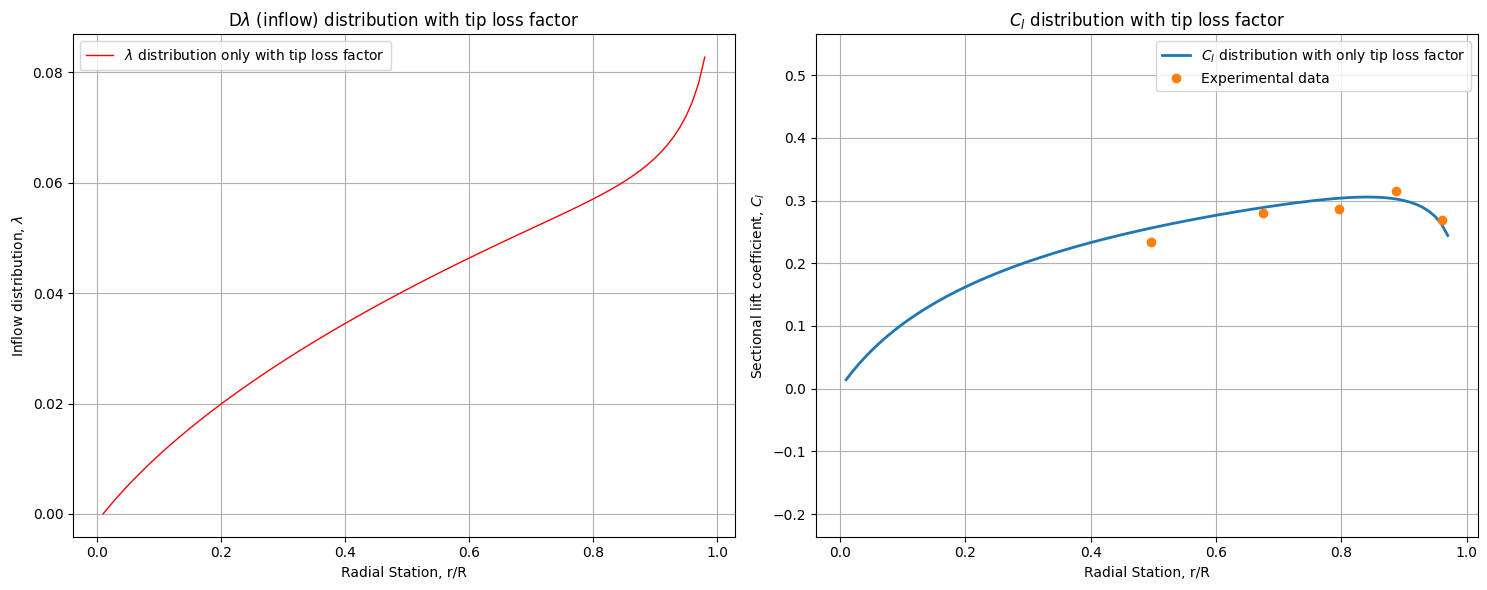

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Inflow corrected with tip losses
ax1.plot(rR[1:len(F)], Lambda_corrected, label='$\lambda$ distribution only with tip loss factor', linewidth=1,c='r')
ax1.set_title('D$\lambda$ (inflow) distribution with tip loss factor')
ax1.set_xlabel('Radial Station, r/R')
ax1.set_ylabel('Inflow distribution, $\lambda$')
ax1.legend()
ax1.grid()

# Cl distributions corrected with tip losses
Cl_corr = []
for n in range(1, 97):
    deltaCl_c = clalpha * (pitch_rad - (Lambda_corrected[n] / rR[n]))  # Equation 3.79
    Cl_corr.append(deltaCl_c)

ax2.plot(rR[1:97], Cl_corr, label='$C_l$ distribution with only tip loss factor', linewidth=2)
ax2.plot(rRexperimental, Clexperimental, 'o', label='Experimental data')
ax2.set_title('$C_l$ distribution with tip loss factor')
ax2.set_xlabel('Radial Station, r/R')
ax2.set_ylabel('Sectional lift coefficient, $C_l$')
ax2.legend()
ax2.grid()
ax2.axis('equal')

plt.tight_layout()
plt.show()

The section 3.3.10 for tip losses, gives us another tool, in this case is implementing a root loss, which could be a better aproximation.

For the implementation is needed another factor of correction F. In this case, the $f$ being the multiply of tip losses and root losses, following the Equation 3.128:

$$
f = f_{root} f_{tip}
$$

Being f_{root} by the equation 3.127:

$$
f_{root} = \frac{N_b}{2}(\frac{r}{(1-r)\phi})
$$

With th same definition for $\phi = \frac{\lambda(r)}{r}$

Taking advantage with the $f_{tip}$ calculated before, calculate the $F$ factor equals with the same equation 3.120 expressed before.

Then it continue as before, calculating the Inflow ($\lambda$) distribution with the same equation 3.126, calculating the $C_T$ and $C_P$ equals as before with Equations 3.72 and 3.74, respectively. $C_L$ distribution exactly the samen with the equation 3.79 and plotting the results.

CT con correciones: 0.00462844529837957
CP con correciones: 0.0002495917833444366


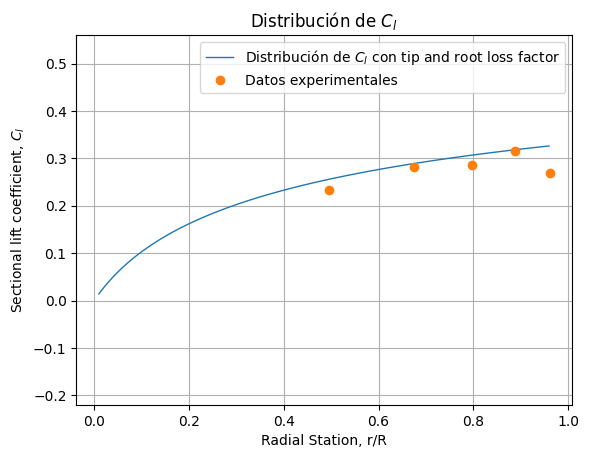

In [11]:
# Incluiding tip and root losses factors

ftot=[]
Ftot=[] #Corrections factor

for n in range(1,len(Lambda_corrected)):

  deltar= (N/2)*((rR[n]**2)/((1-rR[n])*Lambda_n[n])) # Equation 3.127

  ftot= deltar*f_tip[n] # Equation 3.128

  deltaFt=(2/np.pi)*np.arccos(np.exp(-ftot)) # Equation 3.120
  Ftot.append(deltaFt)

Lambda_tot=[]

for i in range(len(Ftot)):
    Lambda_totr = solidity * clalpha / (16*Ftot[i]) * (np.sqrt(1 + (((32*Ftot[i]) / (solidity * clalpha)) * pitch_rad * rR[i])) - 1) # Equation 3.126
    Lambda_tot.append(Lambda_totr)

Cttot=[]
Cptot=[]

for n in range(1,96):
    deltaCttot = (solidity * clalpha) / 2 * (pitch_rad * rR[n]**2 - Lambda_tot[n] * rR[n]) * (rR[n] - rR[n - 1]) # Equation 3.72
    Cttot.append(deltaCttot)

    deltaCptot = Lambda_tot[n]*deltaCttot # Equation 3.74
    Cptot.append(deltaCptot)

Cttot=sum(Cttot)
Cptot=sum(Cptot)

print(f"CT con correciones: {Cttot:}")
print(f"CP con correciones: {Cptot:}")

# Cl distributions

Cltot=[]
for n in range(1,96):
    deltaCltot = clalpha * (pitch_rad - (Lambda_tot[n] / rR[n])) # Equation 3.79
    Cltot.append(deltaCltot)


plt.plot(rR[1:96],Cltot,label='Distribución de $C_l$ con tip and root loss factor',linewidth=1)
plt.plot(rRexperimental,Clexperimental,'o',label='Datos experimentales')
plt.title('Distribución de $C_l$')
plt.xlabel('Radial Station, r/R')
plt.ylabel('Sectional lift coefficient, $C_l$')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

While the $C_T$ value is acceptable for the experimental case (0.0046), the $C_L$ distribution is completely inaccurate and even worse compared to the scenario with only the tip loss factor. This can be mathematically explained by $f_{total}$ as it is a product of the two factors with similar (but not equal) developments. In this case, many elements cancel out, and the most significant aspect is that the tip losses are less dominant. However, with root losses acting simultaneously, the characteristic effects of tip losses are diminished.

From the previous development, we can correctly conclude that the best replication is achieved with *only* tip losses. The $C_{L_\alpha}$ value is manually adjusted to 4.5; however, this value needs to be modified for the analysis mentioned at the beginning. This indicates a correction that depends only on the airfoil, and it is the only known method for this assignment to include such corrections.

## B) Extract the required overall power

*NOTE*: The data used next was obtained with only tip losses, as previously justified.

Following the section 3.3.9 (Power Estimates for the Rotor) we know that the $C_P$ calculated before is really the $C_{P_i}$ (induced power).

We will calculated the induced power factor ($k$) because it will be used after to calculate the Figure of Merit (FM), using the Equation 3.114.

$$
k = \frac{C_{P_i}\sqrt{2}}{C_T^{3/2}}
$$

So, for a more accurate calculation of the rotor profile power, we must consider the variation in sectional drag coefficient with blade section AoA.

The sectional drag coefficient can be calculate with the approximation by:

$$
C_d = C_{d_0} + d_1\alpha + d_2\alpha^{2}
$$

And the Parasite drag ($C_{d_0}$) for the indicated NACA-0012 airfoil (Used in the experiment) could be define by:

$$
C_{d_0} = 0.0044 + 0.018R_e^{-0.15}
$$

A given $d_1=0.02$ and $d_2=0.4$ will help.

Then, we could define the conditions to find the Reynolds number needed. Searching the report for the Caradonna-Tung experiment, we could find that te experiment was made in the NASA ames research center, California. That center is located so at sea leve, so, we will use standar conditions at sea level, which means: a density $\rho = 1.225 Kg/m^3$ and a dynamic viscosity $\mu = 1.81 e^{-5} Pa*s$.

With the $C_{d_0}$ calculated, the $C_{P_0}$ can be calculated from the equation 3.117:

$$
C_{P_0} = \frac{\sigma}{2}\int_{0}^{1} [C_{d_0} + d_1(\theta-\frac{\lambda}{r}) + d_2(\theta-\frac{\lambda}{r})^{2}]r^{3}dr
$$

Now with the induced power coefficient ($C_{P_i}$) and parasite power coefficient ($C_{P_0}$) we know that:

$$
C_P = C_{P_i} + C_{P_0}
$$

In [12]:
# finding the Reynolds number
# Considering standart condition in the NASA AMES research center, california
# 15°C and 101.325 Pa - ISA

rho = 1.225 # [Kg/m^3] Density
viscos = 1.81e-5 # [Pa.s] Dynamic viscosity
V = 150 #m/s speed given by the experiment

Re = (rho*V*b)/viscos # Reynolds number at given conditions

# From the drag information for NACA 0012

d1 = 0.02
d2 = 0.4
Cdo = 0.0044 + 0.018*(Re**(-0.15)) # Parasite drag

# Induced power found with only tip losses
Cpi = CP_corrected # Equation 3.113

k = (Cpi*np.sqrt(2))/((CT_corrected)**(3/2)) # induced power factor k. Equation 3.114

# Computing parasite power
Cpo_n = []
for n in range(1,len(Lambda_corrected)):
  Cpo_i = (solidity/2)*(Cdo+d1*(pitch_rad-(Lambda_corrected[n]/rR[n]))+d2*((pitch_rad-(Lambda_corrected[n]/rR[n]))**2))*rR[n]**3 * (rR[n]-rR[n-1]) # Equation 3.117
  Cpo_n.append(Cpo_i)

Cpo = sum(Cpo_n)

CP_total = Cpi + Cpo # Total power coefficient

print(f'The required overall power is: {CP_total}')

The required overall power is: 0.00037102875818383573


The total coeffiicient power $C_P$ equals 0.000371 which is a fair value seeing another values given by the book for example in the Figure 3.15.

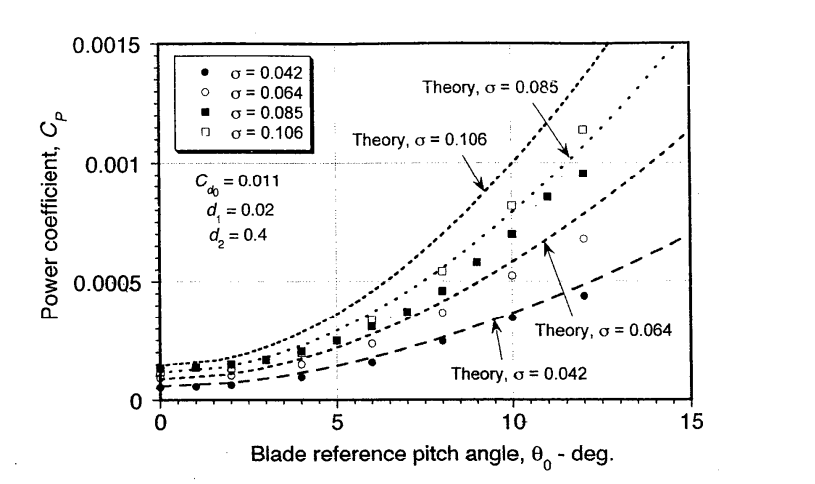

The value for the $C_P$ will not be compared in the graph because the conditions can not be compare, but, is a good indicate for a real value.

Next, we could plot the $C_P$ value (added $C_{P_i}$ and $C_{P_0}$) for each section depending on the Inflow ($\lambda$) and obtain the plot below.

It does not have any comparations finded in the book, but, analyzing the figure we can conclude that the power need along the blade increment along the radius, it could represent the effects given by the *drag* on the tip, another analysis could be for the distance from the root, remembering that the power is relationated with the Torque ($Q$) is logic think it would affect the distance being bigger at the tip.

We could not talk about the values for each $C_P$ so, that values maybe not be certain, but the distribution has a lot of logic.

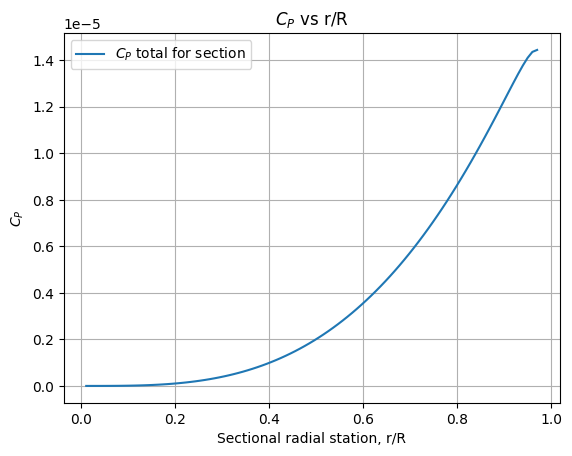

In [13]:
# C_P section

Cp_section = []
for i in range(len(Cpo_n)):
  Cp_section_n = CP_corr[i] + Cpo_n[i]
  Cp_section.append(Cp_section_n)

plt.plot(rR[1:len(Lambda_corrected)],Cp_section,label='$C_P$ total for section')
plt.xlabel("Sectional radial station, r/R")
plt.ylabel("$C_P$")
plt.title("$C_P$ vs r/R")
plt.legend()
plt.grid()
plt.show()

## c) Try and improve the performance relative to your previous results

The goal now is try to get a better performance: $C_l$ distribution, $C_P$ required, Inflow ($\lambda$), Figure of Merit (FM), etc. Starting from the data obtained in A and B and for a hover condition preserving the conditions (For example $C_T$ to make it comparable for hover ... the same weight) and airfoil (NACA 0012), for this we will keep the $C_{L_\alpha}$.

Starting with the section 3.3.7 (The Optimum Hovering Rotor) the fisrt thing we should find is an AoA (Angle of Attack) corresponding to the maximum $C_l$/$C_d$ condition, this angle is required to get the minimum induceed power and for this getting an uniform inflow over the disk, like a constant inflow over the blade.

This angle is defined by two analysis: The first one is given by airfoiltools, searching http://airfoiltools.com/airfoil/details?airfoil=n0012-il#polars we conclude an Angle of Attack of 7.5 or 8.5 degrees, seeing the tendence of the graphic. The second one is the figure 3.9 from Leishman.

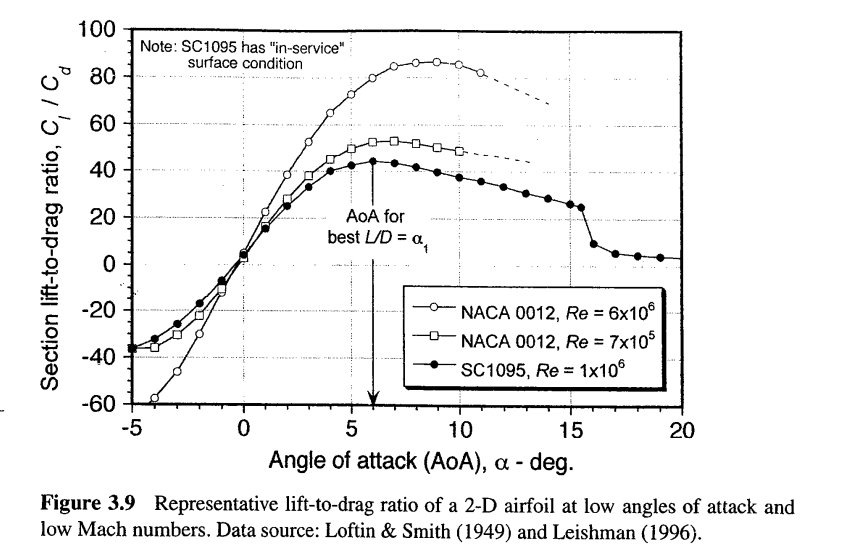

The Reynolds presented for the NACA 0012 in the figure is not the same, but, it gives an upper and lower limit, giving a limit in the AoA between 6 and 9 degrees, which is consistent with our previous analysis. For this reason an AoA of $\alpha = 8.5°$ is chosen.


Now, is presented in the text that the geometry of the blade has to change to get a better performance. Giving a geometry optimum like a hiperbolic function, i.e. the chord has to decrease along the radius. A good way to achieve this is; get a local solidity depending on the AoA and CT required, also make a new pitch angle ($\theta$) distribution.

So, in first place we will calculate the solidity ($\sigma(r)$) distribution for an optimum rotor defined by the Equation 3.102.

$$
\sigma(r) = (\frac{4C_T}{C_{L_\alpha}\alpha_1})\frac{1}{r}
$$

At the same time and for the same AoA ($\alpha_1$) of 8.5° we could calculate the pitch distribution by the equation 3.103.

$$
\theta(r) = \alpha_1 + \sqrt{\frac{C_T}{2}}(\frac{1}{r})
$$

Next, we will use a previously known Equation 3.126, which was used for calculating the Inflow with the tip loss factor. This was the inflow model chosen for this analysis. We will keep the factor $F$, as determining a new factor requires knowing the inflow distribution, which is precisely what we are trying to find. Therefore, using the existing factor is the only option.

After obtaining the new Inflow ($\sigma(r)$) distribution, we will plot both the old and new distributions and perform an analysis based on the visual comparison of the results.

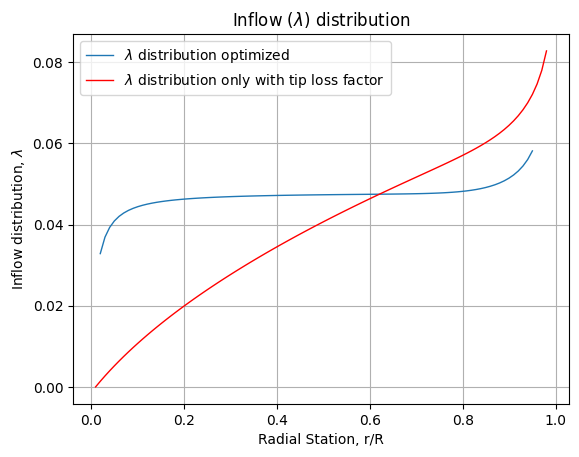

In [14]:
# Solidity distribution optimum hovering rotor

alpha1 = 8.5*np.pi/180 # AoA for optimun
solidity_opt = []
for i in range(1,len(CT_corr)):
  solidity_opt.append(((4*CT_corrected)/(clalpha*alpha1))*(1/rR[i])) # Equation 3.102

# Pitch distribution optimum hovering rotor
pitch_tw = []
for i in range(1,len(CT_corr)):
  pitch_tw.append(alpha1+(np.sqrt(CT_corrected/2)*(1/rR[i]))) # Equation 3.103

# Inflow distribution for optimum hovering rotor
Lambda_opt = []
for i in range(len(solidity_opt)):
  Lambda_opt.append((solidity_opt[i]*clalpha/(16*F[i]))*(np.sqrt(1+(((32*F[i])/(solidity_opt[i]*clalpha))*pitch_tw[i]*rR[i]))-1)) # Equation 3.126

plt.plot(rR[2:len(Lambda_opt)],Lambda_opt[2:],label='$\lambda$ distribution optimized',linewidth=1)
plt.plot(rR[1:len(F)],Lambda_corrected,label='$\lambda$ distribution only with tip loss factor',linewidth=1,c='r')
plt.title('Inflow ($\lambda$) distribution')
plt.xlabel('Radial Station, r/R')
plt.ylabel('Inflow distribution, $\lambda$')
plt.grid()
plt.legend()
plt.show()

As we can see, the blue plot represents the distribution obtained with the new pitch angle and solidity distributions, which is visually more uniform along the radius. *This uniformity was the goal we aimed to achieve*. Another positive aspect is that the effects at the tip are preserved, indicating that the factor $F$ used is a sufficiently accurate approximation for the experimental case, without losing the characteristic effects in the new distribution.

With this plot, we can confidently say that the rotor's performance in hover should be improved. However, let's compare both cases to further justify that this is indeed a better rotor.

As we can read in the book the geometry looked for the optimum rotor is ilustred in the figure 3.11

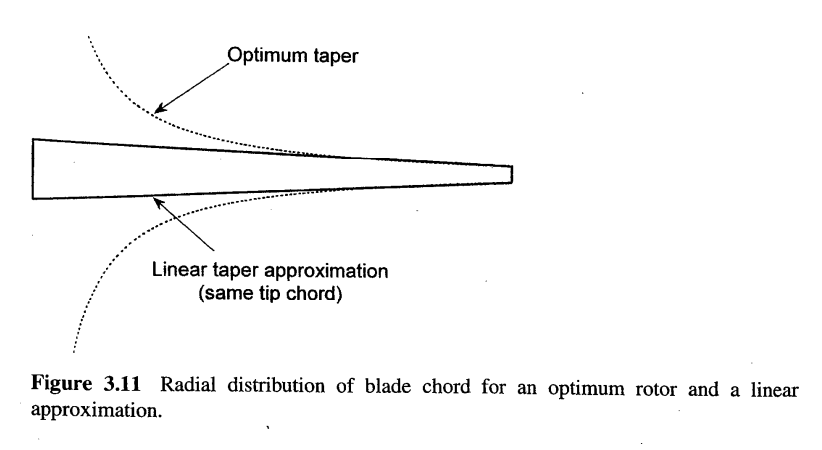

Therefore, for the plots below we can conclude that all the new distributions makes sense with the theory.

For the experimental case of Caradonna-Tung, the pitch angle, the chord and then consequently the solidity are constants. However, for an optimization in computation we could define a geometry that usually should be difficult to build. In this case, all the distributions approach the hyperbolic trend, giving us an ideal of the new performance of the rotor.

It makes sense that all three values decrease along the radius because as the pitch angle decreases, the chord also decreases by logic to keep an uniform Inflow. And for the next relationship:

$$
\sigma(r) = \frac{N_bc(r)}{\pi R}
$$

We can conclude that the solidity will be small depending on the chord. The previous equation allows us to plot the chord distribution. Since we already know the optimal solidity distribution, we can obtain the chord distribution as follows:

$$
c(r) = \frac{\sigma(r)\pi R}{N_b}
$$

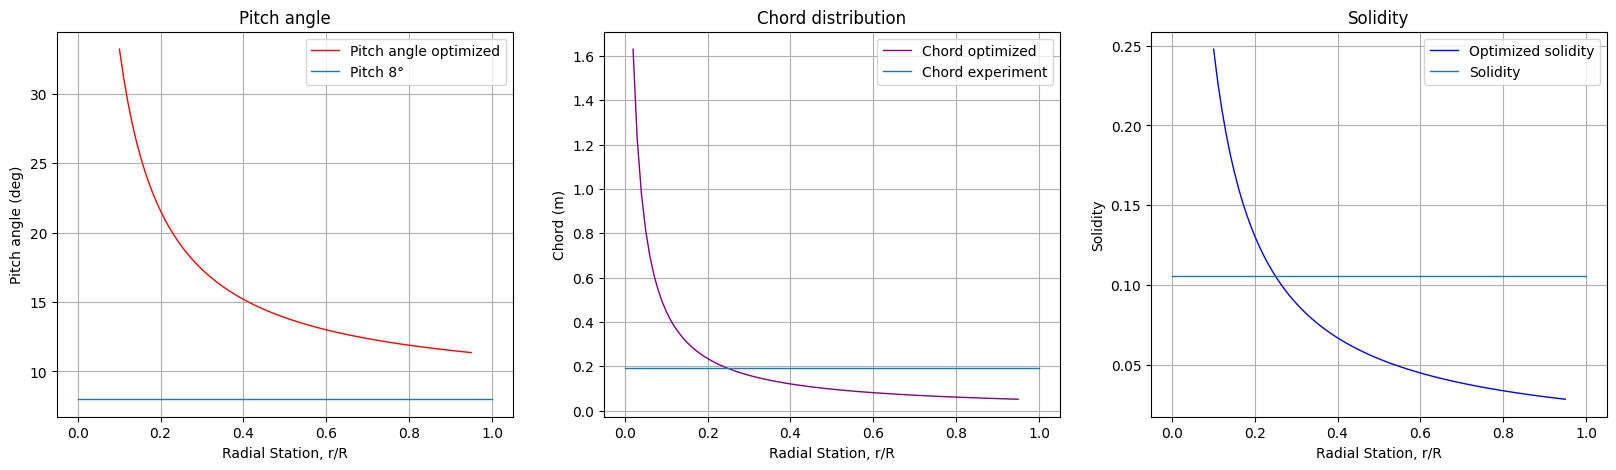

In [15]:
# Distribution of pitch angles, chord and solidity
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

pitch_tw_deg = []
for i in range(len(pitch_tw)):
  pitch_tw_deg.append(pitch_tw[i]*180/np.pi) # Rad to degree for each pitch alogn the radius

ax1.plot(rR[10:len(Lambda_opt)],pitch_tw_deg[10:],label='Pitch angle optimized',linewidth=1,c = 'r')
ax1.plot(rR, [pitch] * len(rR), label='Pitch 8°', linewidth=1)
ax1.set_title('Pitch angle')
ax1.set_xlabel('Radial Station, r/R')
ax1.set_ylabel('Pitch angle (deg)')
ax1.grid()
ax1.legend()

# Chord distribution
C = []
for i in range(len(solidity_opt)):
  C.append(solidity_opt[i]*np.pi*R/N)

ax2.plot(rR[2:len(Lambda_opt)],C[2:],label='Chord optimized',linewidth=1, c='purple')
ax2.plot(rR, [b] * len(rR), label='Chord experiment', linewidth=1)
ax2.set_title('Chord distribution')
ax2.set_xlabel('Radial Station, r/R')
ax2.set_ylabel('Chord (m)')
ax2.grid()
ax2.legend()

# Solidity distribution
ax3.plot(rR[10:len(solidity_opt)],solidity_opt[10:],label='Optimized solidity',linewidth=1,c='b')
ax3.plot(rR, [solidity] * len(rR), label='Solidity', linewidth=1)
ax3.set_title('Solidity')
ax3.set_xlabel('Radial Station, r/R')
ax3.set_ylabel('Solidity')
ax3.grid()
ax3.legend()

Now, continuing with the comparison between the optimized rotor and the experimental rotor, we can calculate $C_T$ and $C_P$ ($C_{P_i},C_{P_0}$) to determine if the total values of these coefficients have changed and how they have changed. The development follows the same procedure as before, and the equations are referenced in the code for convenience.

Essentially, we first find $C_T$ for the new inflow and pitch angle distributions. Next, $C_{P_i}$ is computed. Then, we determine the same conditions for the Reynolds number and $C_{d_0}$ keepin the airfoil, after that the C_{P_0} will be adjusted for the new distributions. Finally, we sum both power coefficients to obtain the total power required.

The induced power factor optimized, $k_{opt}$ is also computed for the comparison of the figure of merit.

In [16]:
#Finding CT and CP

Ct_opt = []
Cpi_opt = []

for n in range(len(solidity_opt)):
    deltaCtopt = (solidity_opt[n] * clalpha) / 2 * (pitch_tw[n] * rR[n]**2 - Lambda_opt[n] * rR[n]) * (rR[n] - rR[n - 1]) # Equation 3.72
    Ct_opt.append(deltaCtopt)

    deltaCpi_opt = Lambda_opt[n]*deltaCtopt # Equation 3.74
    Cpi_opt.append(deltaCpi_opt)

CT_optimized=sum(Ct_opt)
CPi_optimized=sum(Cpi_opt)

print(f"CT con correciones: {CT_optimized:}")
print(f"CPi con correciones: {CPi_optimized:}")

k_opt = (CPi_optimized*np.sqrt(2))/((CT_optimized)**(3/2)) # induced power factor optimized k. Equation 3.114

# Drag conditions of NACA 0012
d1 = 0.02
d2 = 0.4
Cdo = 0.0044 + 0.018*(Re**(-0.15)) # Parasite drag


# Computing parasite power
Cpo_opt = []
for n in range(1,len(solidity_opt)):
  Cpo_iopt = (solidity_opt[n]/2)*(Cdo+d1*(pitch_tw[n]-(Lambda_opt[n]/rR[n]))+d2*((pitch_tw[n]-(Lambda_opt[n]/rR[n]))**2))*rR[n]**3 * (rR[n]-rR[n-1]) # Equation 3.117
  Cpo_opt.append(Cpo_iopt)

CPo_optimized = sum(Cpo_opt)

CP_total_optimized = CPi_optimized + CPo_optimized # Total power coefficient

print(f'The required overall power is: {CP_total_optimized}')


CT con correciones: 0.004041198089779115
CPi con correciones: 0.0001957973767394702
The required overall power is: 0.0002661197986082426


As we can see, the thrust coefficient has changed. Even though we calculated all the parameters around the 0.0046 value, this could be due to several reasons. One reason could be the low solidity values. Another could be the loss of data points at the root due to numerical solutions (e.g., division by zero). Additionally, maintaining the $C_{l_\alpha}$ value or changing the geometry to an ideal hover configuration could result in a distribution at the tip that is essentially ideal but not realistic. Nevertheless, the obtained value of 0.00404 is not significantly different from the experimental value of 0.0046, which allows us to conclude that this is a good optimization while trying to maintain the conditions.

On the other hand, the power coefficient has decreased, which was our aim. Therefore, under similar conditions, the reduction in power requirement is considerable, leading to improved rotor performance. The decrease in the power coefficient was greater than the difference in the thrust coefficient which means an achieve for the performance.

An optional comparison that would be valuable is given by the $C_l$ distributions. Using Equation 3.79, we will calculate the coefficient distribution again, but this time with the new pitch angles and Inflows.

The plot below is quite surprising, as it shows a significant increase in the distribution of sectional lift, indicating that optimizing the rectangular blade will enhance performance in hover conditions. Another important observation is that the lift coefficient is uniform along the radius. This uniformity suggests improved efficiency of the blade under the same conditions. Furthermore, the consistent distribution reinforces our conclusion regarding the effectiveness of the optimization.

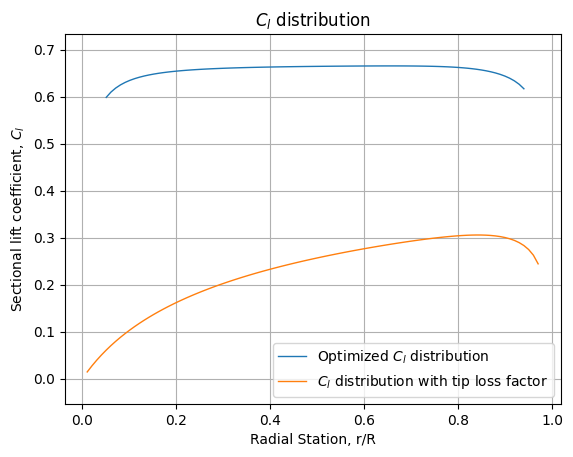

In [17]:
Cl_opt = []
for n in range(1,len(Lambda_opt)):
  deltaCl_opt = clalpha*(pitch_tw[n]-(Lambda_opt[n]/rR[n])) # Equation 3.79
  Cl_opt.append(deltaCl_opt)

plt.plot(rR[5:len(Cl_opt)],Cl_opt[5:],label='Optimized $C_l$ distribution',linewidth=1)
plt.plot(rR[1:97],Cl_corr,label='$C_l$ distribution with tip loss factor',linewidth=1)
# plt.plot(rRexperimental,Clexperimental,'o',label='Datos experimentales')
plt.title('$C_l$ distribution')
plt.xlabel('Radial Station, r/R')
plt.ylabel('Sectional lift coefficient, $C_l$')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

The comparison provides sufficient evidence to conclude that it is a good improve of the performance. However, there is one more concept that offers a dimensionless comparison of efficiency: the Figure of Merit (FM). In this case, we will use the simplest version, as seen in Equation 3.129.

$$
FM = \frac{C_{P_{ideal}}}{C_{P_i}+C_{P_O}}
$$

In this case, each figure of merit (FM) is calculated for the power obtained in both the experimental and improved performance scenarios, incorporating the correction factor k for each one.

The results indicate that the optimization achieved is greater than the experimental values in terms of efficiency. The values obtained are consistent with the experimental data presented in class, allowing us to conclude that this is a valid comparison.

Therefore, since the optimized figure of merit is higher, it implies that the optimized performance is more efficient than the experimental performance.

In [18]:
FM_exp = Cpi/(k*Cpi+Cpo) # Equation 3.129
FM_opt = CPi_optimized/(k_opt*CPi_optimized+CPo_optimized) # Equation 3.129

print(f'FM experimental: {FM_exp}')
print(f'FM optimized: {FM_opt}')

FM experimental: 0.6215744688106277
FM optimized: 0.6958917915039173


This replication and optimization was really helpfull to understand how rotors work, at least in a good aproximation, presenting to us a theory which could accurately help us to emulate experimental cases and is (Considering the difficult of the rotary wing) ''easy'' to understand.

The goals have been achieved in each aspect, allowing us to conclude that this is a successful work.

Reference:

Leishman, G. J. (2006). Principles of Helicopter Aerodynamics with CD Extra. Cambridge University Press.